In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('scores400.csv')

In [6]:
df # 성적의 데이터 index 학생 수

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


### 기술통계적인 것을 저번 시간에 배움

### 추측통계를 통해 배울 것
- 통계적인 성질을 추측하는 방식
- 가설검정 통계적인 다양한 귀무가설, 대립가설 등
- 그 전에 앞서 모집단과 표본, 확률, 확률분포 것들을 간단하게 확인하고 넘어가야 한다.

- 위의 데이터가 400명이 전교생이라함
- 나는 2학년 1반
- 400명은 2학년 반별 모든 데이터라 가정

- 기말고사를 보고 바로 끝난 시점에서는 모든 점수를 알 순 없다.
- 가채점-> 대략적인 점수를 확인한다.
- 70점 시험이 잘 본 건가? 못 본건가? 감이 없다.
- 주변에 같은 반 친구들한테 몇 점? 5~10명 점수를 물어봄 -> 평균이 60점 나는 70점인데 주변 친구들 점수 평균이 60점
- 나는 생각보다 잘 봤다! 라고 판단

- 우리 학년 우리 반 데이터보고 전체 평균을 가정할 순 없다.
- 우리 반의 나와 친한 친구 -> 편향
- 편향으로 이루진 데이터를 가지고 판단하면 안 된다.

In [7]:
scores = np.array(df['score'])

In [8]:
scores.mean()

69.53

- 관측하고 싶은 전체 대상 모집단 ( 2학년 전체 )
- 관측 대상에서 일부분을 뽑은 것이 표본 ( 우리 반 나의 친구 5~10명 )

- 표본추출 -> 표본 추출에 근본은 어디냐면 모집단

- 추측을 한다는 것은->?
- 내가 점수가 70점인데 정말 잘 한 건가? 의문
- 전체 모집단의 점수를 확인해서 이 부분을 보고 평가를 해야 한다.
- 전체 모집단의 점수를 당장은 알 수 없으니 추측 -> 표본을 가지고 추측을 하게 된다.

- 1. 표본에 대한 기준 필요하다.
- 표본의 수 통계적으로는 30명 이상이 되어야함.
- 표본의 크기를 구하는 공식 -> 최소 이 가설이 유의하려면 어느정도의 표본이 필요하다.
- 2. 표본을 추츨하는 방법
- 랜덤샘플링, 층화추출법.. 등등 표본을 추출하는 방법
- 3. 복원, 비복원 추출
- 표본을 조사하는데 한 명 물어보면 그 친구하는 중복으로 물어보지 않는 경우나, 중복으로 물어보는 경우
- 뽑기 같은 경우 상자 안에 주머니 뭐가있는데 하나를 뽑으면 다시 넣지 않거나, 하나를 뽑으면 다시 넣는다.
- 전체 표본자체가 동일하게 이뤄지는 것 복원

In [9]:
#무작위 추출
np.random.choice([1,2,3,4,5,6],2)

array([6, 3])

In [10]:
#replace : 중복 허용 / 허용안함
np.random.choice([1,2,3,4,5,6],2, replace=True)

array([3, 1])

In [11]:
#무작위 추출하지만 계산 결과는 다를 수 있다.
#난수를 만들 때, 난수에 대한 시드를 만들어서 매번 숫자가 동일한 난수를 얻게 만든다.
np.random.seed(111)
np.random.choice([1,2,3,4,5,6],2)

#머신러닝-> 비교할 때 random.seed를 통해 무작위 추출 값을 고정할 수 있다.

array([5, 5])

In [12]:
np.random.seed(1111)
sample = np.random.choice(df['score'],20)
sample.mean()

67.0

- 전체평균은 69.53 인데, 한 번 샘플을 통해서 확인한 결과는 67점이 나왔다.
- 무작위추출을 여러번 하게 되면 어떤 결과가 나오나?

In [13]:
c =[]
for i in range(30):
    sample = np.random.choice(df['score'],20)
    print(f'{i+1}번째 무작위로 추출한 표본평균', sample.mean())
    c.append(sample)
print(np.mean(c))

1번째 무작위로 추출한 표본평균 72.85
2번째 무작위로 추출한 표본평균 69.2
3번째 무작위로 추출한 표본평균 64.45
4번째 무작위로 추출한 표본평균 72.65
5번째 무작위로 추출한 표본평균 67.9
6번째 무작위로 추출한 표본평균 66.95
7번째 무작위로 추출한 표본평균 71.25
8번째 무작위로 추출한 표본평균 72.05
9번째 무작위로 추출한 표본평균 68.05
10번째 무작위로 추출한 표본평균 63.85
11번째 무작위로 추출한 표본평균 76.05
12번째 무작위로 추출한 표본평균 67.3
13번째 무작위로 추출한 표본평균 71.3
14번째 무작위로 추출한 표본평균 66.25
15번째 무작위로 추출한 표본평균 69.85
16번째 무작위로 추출한 표본평균 69.35
17번째 무작위로 추출한 표본평균 72.0
18번째 무작위로 추출한 표본평균 72.85
19번째 무작위로 추출한 표본평균 70.3
20번째 무작위로 추출한 표본평균 66.1
21번째 무작위로 추출한 표본평균 66.55
22번째 무작위로 추출한 표본평균 70.1
23번째 무작위로 추출한 표본평균 73.95
24번째 무작위로 추출한 표본평균 69.15
25번째 무작위로 추출한 표본평균 71.85
26번째 무작위로 추출한 표본평균 75.15
27번째 무작위로 추출한 표본평균 69.45
28번째 무작위로 추출한 표본평균 71.4
29번째 무작위로 추출한 표본평균 72.7
30번째 무작위로 추출한 표본평균 68.6
69.98166666666667


- 불안정한 숫자들이 존재한다.
- 이런 현상을 해석하기 위해서 확률을 사용해야한다.
- ex) 주사위에서 1눈을  뽑는 확률은 1/6

- 확률모형

- 확률이라는 것은 -> 그 값들이 나올 확률이 결정되는 게 결국 확률변수
- 주사위 눈 1~6
- 내가 주사위를 돌릴 때 마다 항상 같은 값은 얻을 수 없다.
- 확률로 생각을 하면 1/6
- 확률로 접근해서 통계적으로 풀어보자!

- 확률의 중요한 성질
- ' 사건이 서로 배반이면, 그중에 적어도 하나 일어나는 사건의 각 사건의 확률의 합과 같다.'
- ' 각 사건이 서로 상호배반이면 동시에 일어날 수 없다.'
- 확률이 합이 1
- 합이 1라는 것이

- 확률분포
- 확률분포란?- 확률변수가 어떻게 움직이는지를 나타내는 것
- 전체확률 1 그 1을 가지고 확률변수가 어떤 분포를 나타나고 잇는지를 나타냄
- 주사위 1 1/6 ... 6 1/6

- 추측통계에서도 마찬가지로 해당 모집단을 가지고 표본을 추출하는 경우 ( 무작위로 추출하는 경우)  확률 모형으로 나타낼 수 있고, 무작위추출로 얻은 표본은 모집단의 확률분포를 따르는 확률변수로 간주할 수 있다.

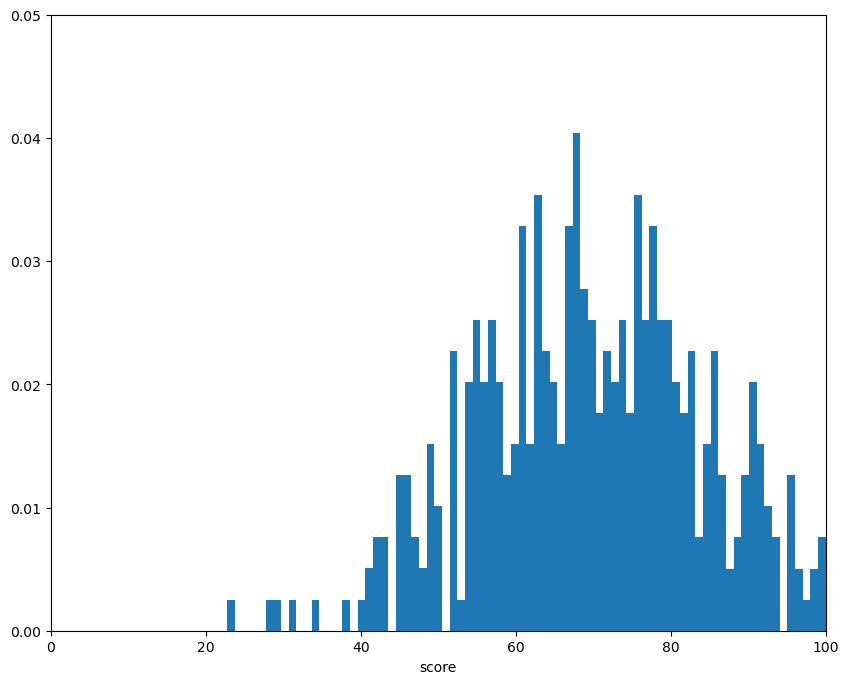

In [14]:
#전체 전교생 시험 점수 분포
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(df['score'], bins=100, range=(1,100), density= True)
ax.set_xlim(0,100)
ax.set_ylim(0, 0.05)
ax.set_xlabel('score')
plt.show()
#100 단위로 끊어서 히스토그램을 만든다.
# density = True면 정규화시킨 후 그린다.

- 70점을 얻은 학생 전교생에서 0.04 정도 차지한다. 전체 4%를 차지한다.
- 무작위추출로 수행하면 4%확률로 -> 70점이라는 표본 데이터를 얻을 수 있다.

### 중심극한정리
- 통계학에서 중요한 키워드 이다.
- 무작위로 추출을 진행하며, 표본의 크기도 커지고, 표본의 데이터가 커진다. -> 그것들이 실제의 확률 분포와 가까워진다.

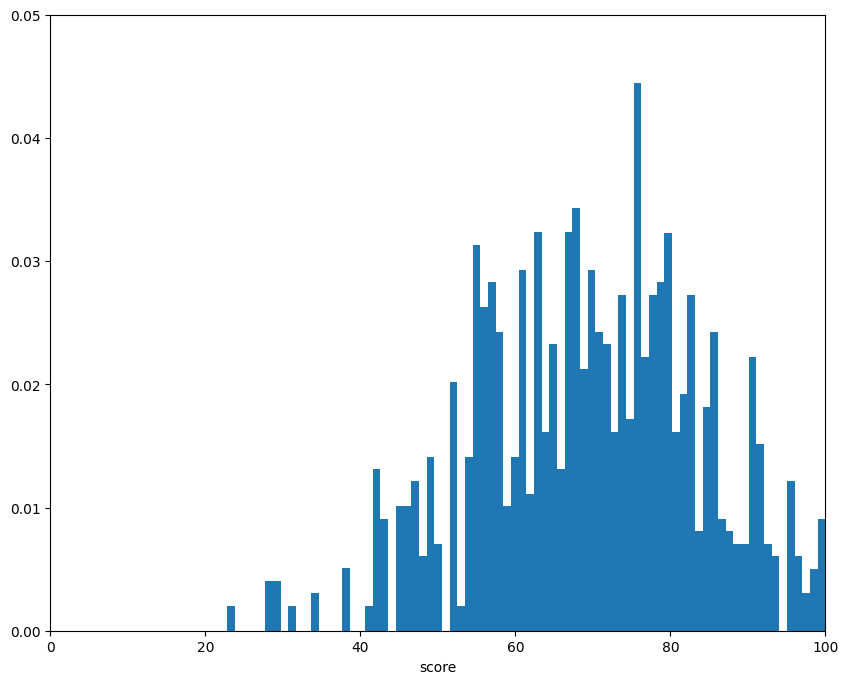

In [17]:
# 1000번 랜덤으로 뽑은 샘플에 대한 그래프
sample = np.random.choice(df['score'],1000)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(1,100), density= True)
ax.set_xlim(0,100)
ax.set_ylim(0, 0.05)
ax.set_xlabel('score')
plt.show()

- 표본 평균을 가지고 진행을 해보자
- 표본을 뽑아서 표본에 대한 평균을 가지고 분포를 만들어 보면 어떤 식으로 그려지는지?

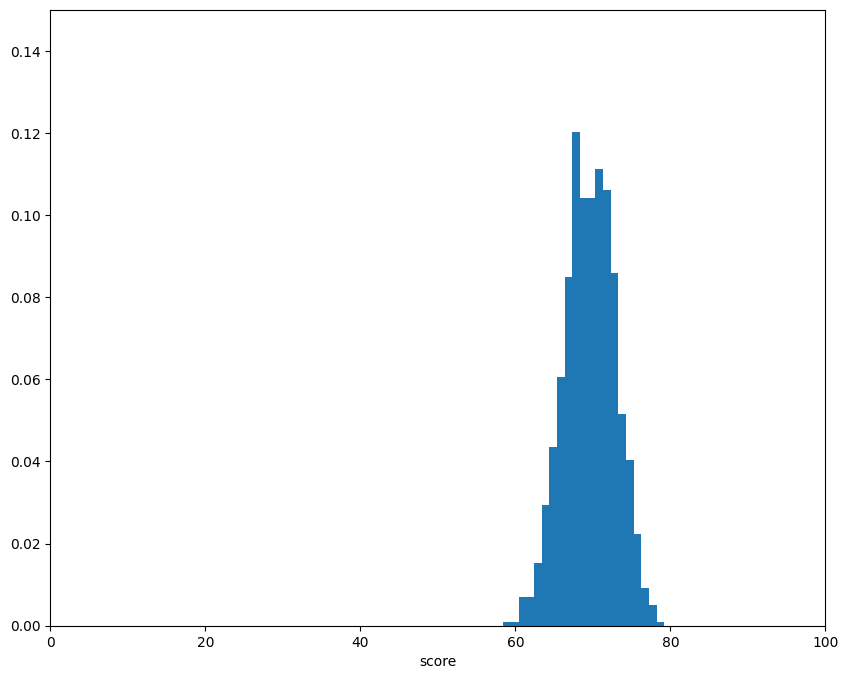

In [18]:
sample_mean = [np.random.choice(df['score'],20).mean() for _ in range(1000)]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(sample_mean, bins=100, range=(1,100), density= True)
ax.set_xlim(0,100)
ax.set_ylim(0, 0.15)
ax.set_xlabel('score')
plt.show()
# 20개씩 뽑은 샘플을 1000개 돌린 것에 대해 평균의 그래프

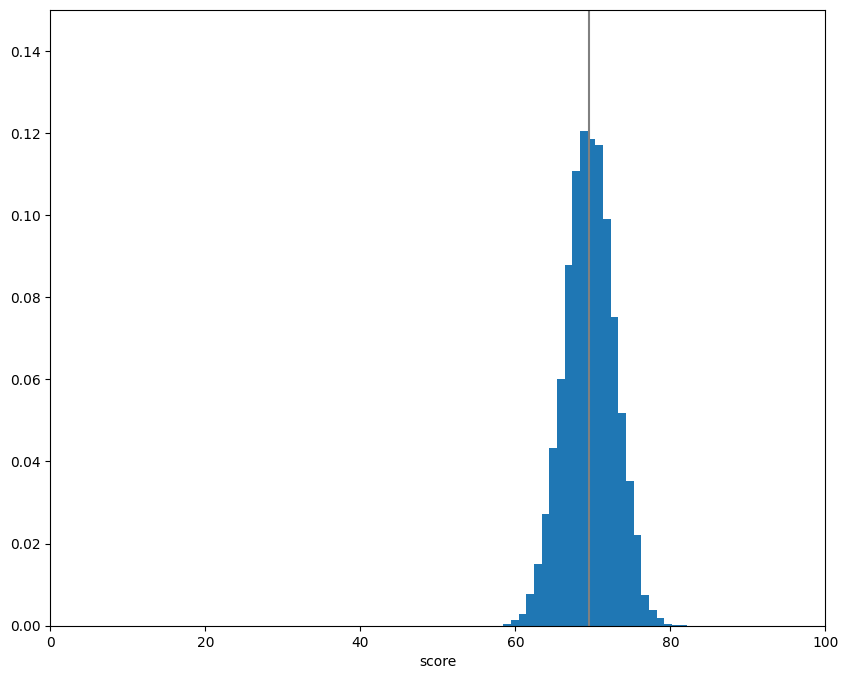

In [20]:
sample_mean = [np.random.choice(df['score'],20).mean() for _ in range(10000)]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(sample_mean, bins=100, range=(1,100), density= True)
ax.vlines(np.mean(sample_mean),0,1,'grey')
ax.set_xlim(0,100)
ax.set_ylim(0, 0.15)
ax.set_xlabel('score')
plt.show()
# 10000개 샘플
# vlines(a,b,c) : b,c 사이에서 a인 곳에 수직선 표시

- 무작위추출로 인한 표본평균으로 모평균 추측할 수 있는 것이 -> 실제로 10,000번 이상 진행해보니 분포자체가 모평균에 근처에 분포되어 있는 것 확인
- 이 근거로 우리가 표본평균으로 모평균을 추측할 수 있다.

## 추측통계

- 추정 : 모수를 추측하는 것, 하나의 것으로 추정하는 것, 점 추청, 구간 추정  
- 검정 : 모집단의 통계적인 성질에 대해서 가설을 세우고, 그 가설이 옳은지 여부를 판단하는 것

- 내 수학점수를 보고 주변 내친구의 점수를 가지고 -> 전체 학년 점수를 추측한다. 이게 정말 맞는가?